In [18]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, Activation

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
logr = Sequential()
logr.add(Dense(1, input_dim=2, activation='sigmoid'))
logr.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
def sampler(n, x, y):
    return np.random.normal(size=[n, 2]) + [x, y]

In [21]:
def sample_data(n=1000, p0=(-1., -1), p1=(1., 1.)):
    zeros, ones = np.zeros((n, 1)), np.ones((n, 1))
    labels = np.vstack([zeros, ones])
    z_sample = sampler(n, x=p0[0], y=p0[1])
    o_sample = sampler(n, x=p1[0], y=p1[1])
    return np.vstack([z_sample, o_sample]), labels

In [22]:
X_train, y_train= sample_data()
X_test, y_test = sample_data(100)

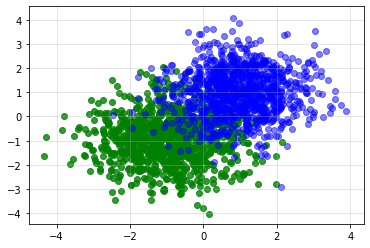

In [24]:
plt.scatter(list(map(lambda x: x[0], X_train[:1000])), (list(map(lambda x: x[1], X_train[:1000]))), color='g', alpha=0.8);
plt.scatter(list(map(lambda x: x[0], X_train[1000:])), (list(map(lambda x: x[1], X_train[1000:]))), color='b', alpha=0.5);
plt.grid(True, alpha=0.4)

In [25]:
logr.fit(X_train, y_train, batch_size=16, epochs=50, verbose=0, validation_data=(X_test, y_test))

In [ ]:
logr.

In [26]:
def f(coef_, x):
    return -(coef_[1][0] + coef_[0][0]*x) / coef_[0][1]

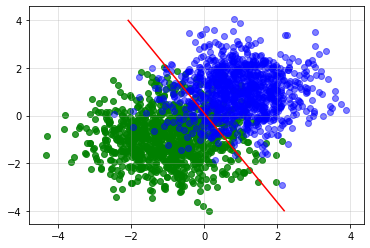

In [30]:
plt.plot(f(logr.get_weights(), np.linspace(-2, 2)), np.linspace(-4, 4), color='r')
plt.scatter(list(map(lambda x: x[0], X_train[:1000])), (list(map(lambda x: x[1], X_train[:1000]))), color='g', alpha=0.8);
plt.scatter(list(map(lambda x: x[0], X_train[1000:])), (list(map(lambda x: x[1], X_train[1000:]))), color='b', alpha=0.5);
plt.grid(True, alpha=0.4)